In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

from nose.tools import (
    assert_equal,
    assert_is_instance,
    assert_almost_equal,
    assert_true,
    assert_is_not
)
from numpy.testing import assert_array_equal

# Download Tweets

In [2]:
# Load the President Trump's tweets
trump_twitter = pd.read_json('trump_tweets_2017.json', encoding='utf8')
trump_twitter.head()

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2017-12-31 04:46:21,58549,947328044821336064,False,13096,Twitter for iPhone,“Trump Rally: Stocks put 2017 in the record bo...
1,2017-12-30 22:42:09,117013,947236393184628736,False,24332,Twitter for iPhone,Jobs are kicking in and companies are coming b...
2,2017-12-30 22:36:41,195754,947235015343202304,False,50342,Twitter for iPhone,"I use Social Media not because I like to, but ..."
3,2017-12-30 21:12:45,73325,947213895286054912,False,16703,Twitter for iPhone,On Taxes: “This is the biggest corporate rate ...
4,2017-12-30 19:02:53,78932,947181212468203520,False,23270,Twitter for iPhone,"Oppressive regimes cannot endure forever, and ..."


# Preprocessing

In [3]:
def clean_data(df):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    
    Returns
    -------
    result: a Pandas DataFrame.
    '''

    result = df.loc[df["created_at"] >= "2017-01-20", :]
    result = result.loc[df["is_retweet"] == False, :]
    result = result.drop(['source', 'is_retweet'], axis = 1)
    return result
trump_df = clean_data(trump_twitter)

# Graph Tweets By Hour

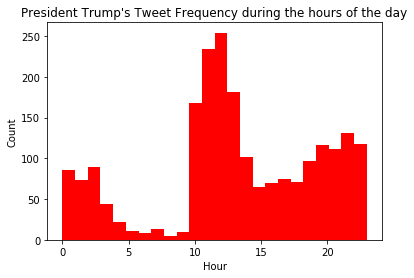

In [4]:
def trump_histogram(df):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    '''
    date_now = datetime.utcnow()
    hours = []
    for time in df['created_at'].values:
        hour = datetime.utcfromtimestamp(time.tolist()/1e9).hour
        hours.append(hour)
    fig, ax = plt.subplots()
    ax.hist(hours, 24, color = 'red')
    plt.title("President Trump's Tweet Frequency during the hours of the day")
    plt.xlabel("Hour")
    plt.ylabel("Count")
    return ax
ax = trump_histogram(trump_df)
plt.show()

In [5]:
def best_worse_tweet(df, variable, n):
    '''    
    Parameters
    ----------
    df: a Pandas DataFrame of President Trump's tweets.
    variable: a String
    n: a Int.
    
    Returns
    -------
    result: a List of strings.
    '''
    low = list(df.sort_values(by = [variable])['text'].values)[-n:][::-1]
    high = list(df.sort_values(by = [variable])['text'].values)[:n]
    result = low + high
    return result
test1 = best_worse_tweet(trump_df, 'retweet_count', 3)
print(test1)
test2 = best_worse_tweet(trump_df, 'favorite_count', 2)
print(test2)

['#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg', 'Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!', 'Despite the constant negative press covfefe', "I don't know Putin, have no deals in Russia, and the haters are going crazy - yet Obama can make a deal with Iran, #1in terror, no problem!", 'Will be interviewed on @oreillyfactor tonight at 8:00 P.M.', 'Playef golf today with Prime Minister Abe of Japan and @TheBig_Easy, Ernie Els, and had a great time. Japan is very well represented!']
['Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!', '#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg', 'Playef golf today with Prime Minister Abe of Japan and @TheBig_Easy, Ernie Els, and had a great time. Japan is very well represented!', "I don't know Putin, h

# Get Negative and Positive Words

In [10]:
import re

trump_tweets = []
for i in list(trump_df['text']):
    trump_tweets.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", i).split()).lower())

In [11]:
from urllib.request import urlopen

# Load the text file of negative words
data = urlopen('http://ptrckprry.com/course/ssd/data/negative-words.txt')

negative_words = []
for line in data:
    # Remove the comments from the file
    if ';' not in str(line):
        negative_words.append((line.strip()).decode('latin-1'))
negative_words = list(filter(None, negative_words))


# Load the text file of positive words
data = urlopen('http://ptrckprry.com/course/ssd/data/positive-words.txt')

positive_words = []
for line in data:
    # Remove the comments from the file
    if ';' not in str(line):
        positive_words.append((line.strip()).decode('latin-1'))
positive_words = list(filter(None, positive_words))

# Print some negative words
print(negative_words[0:10])

# Print some positive words
print(positive_words[0:10])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


In [12]:
def pos_neg_prop(tweet, pos_words, neg_words):
    '''
    Parameters
    ----------
    tweet: a String.
    pos_words: a List of string.
    neg_words: a List of string.
    
    Returns
    -------
    pos_prop: A float.
    neg_prop: A float.
    '''
    twt = tweet.split()
    pos_word_count = 0
    neg_word_count = 0
    total_count = 0
    for word in twt:
        if word in pos_words:
            pos_word_count += 1
        elif word in neg_words:
            neg_word_count += 1
        total_count += 1
    pos_prop = pos_word_count / total_count
    neg_prop = neg_word_count / total_count
    return pos_prop, neg_prop

In [14]:
print(trump_tweets[25])
print(pos_neg_prop(trump_tweets[25], positive_words, negative_words), (0.5, 0.0))
print(trump_tweets[115])
print(pos_neg_prop(trump_tweets[115], positive_words, negative_words), (0.045454545454545456, 0.1590909090909091))
print(trump_tweets[633])
print(pos_neg_prop(trump_tweets[633], positive_words, negative_words), (0.047619047619047616, 0.0))
print(trump_tweets[1124])
print(pos_neg_prop(trump_tweets[1124], positive_words, negative_words), (0.15384615384615385, 0.0))

merry christmas
(0.5, 0.0) (0.5, 0.0)
fake news cnn made a vicious and purposeful mistake yesterday they were caught red handed just like lonely brian ross at abc news who should be immediately fired for his mistake watch to see if fires those responsible or was it just gross incompetence
(0.045454545454545456, 0.1590909090909091) (0.045454545454545456, 0.1590909090909091)
stock market hits an all time high unemployment lowest in 16 years business and manufacturing enthusiasm at highest level in decades
(0.047619047619047616, 0.0) (0.047619047619047616, 0.0)
i would like to thank reince priebus for his service and dedication to his country we accomplished a lot together and i am proud of him
(0.15384615384615385, 0.0) (0.15384615384615385, 0.0)


In [15]:
positive_tweets = 0
negative_tweets = 0

# Determine which tweets are positive/negative based on the proportion of words
for tweet in trump_tweets:
    pos_prop, neg_prop = pos_neg_prop(tweet, positive_words, negative_words)
    if pos_prop > neg_prop:
        positive_tweets += 1
    elif neg_prop > pos_prop:
        negative_tweets += 1

print('Number of Positive Tweets:', positive_tweets)
print('Number of Negative Tweets:', negative_tweets)

Number of Positive Tweets: 1079
Number of Negative Tweets: 548
